In [1]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model

df=pd.read_csv("car_price.csv")
df

,make_model,body_type,Body Color,km,hp,Transmission,Extras,price
0,Audi A3,Station wagon,Orange,5558,85,Manual,"Alloy wheels,Voice Control",5555
1,Audi A1,Sedans,White,115000,85,Manual,"Alloy wheels,Winter tyres",8999
2,Audi A1,Sedans,Black,192000,85,Manual,Alloy wheels,10000
3,Audi A1,Sedans,Red,85000,85,Manual,"Catalytic Converter,Voice Control,Winter tyres",10300
4,Audi A1,Compact,White,130000,85,Manual,Alloy wheels,10490
...,...,...,...,...,...,...,...,...
4795,Audi A3,Compact,Silver,7,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",38495
4796,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",38725
4797,Audi A3,Compact,Grey,7,85,Semi-automatic,"Alloy wheels,Sport seats,Sport suspension",39575
4798,Audi A3,Compact,Grey,750,85,Semi-automatic,"Alloy wheels,Roof rack,Sport seats,Sport suspe...",41495


In [13]:
y = df['km']
x = df['price']

In [14]:
x = sm.add_constant(x) # adding a constant
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)

C:\Users\kotam\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


0       100402.156633
1        83753.434365
2        78914.476470
3        77464.239339
4        76545.755822
            ...      
4795    -58833.880385
4796    -59945.728853
4797    -64054.734058
4798    -73336.251698
4799   -143938.629374
Length: 4800, dtype: float64

In [15]:
lm.summary(x)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                                                                                                                                 OLS Regression Results                                                                                                                                                 
========================================================================================================================================================================================================================================================================================================================
Dep. Variable:           const  price
0       1.0   5555
1       1.0   8999
2       1.0  10000
3       1.0  10300
4       1.0  10490
...     ...    ...
4795    1.0  38495
4796    1.0  38725
4797    1.0  39575
4798    1.0  41495
4799    1.0  56100

[4800 rows x 2 columns]   R-squared:                       0.341
Model:                                                                                                                                                                                                                                                                      OLS   Adj. R-squared:                  0.341
Method:                                                                                                                                                                                                                                                           Least Squares   F-statistic:                     2484.
Date:                                                                                                                                                                                                                                                          Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                                                                                                                                                                                                                                                                  20:20:11   Log-Likelihood:                -56154.
No. Observations:                                                                                                                                                                                                                                                          4800   AIC:                         1.123e+05
Df Residuals:                                                                                                                                                                                                                                                              4798   BIC:                         1.123e+05
Df Model:                                                                                                                                                                                                                                                                     1                                         
Covariance Type:                                                                                                                                                                                                                                                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.273e+05   1958.550     64.974      0.000    1.23e+05    1.31e+05
price         -4.8341      0.097    -49.843      0.000      -5.024      -4.644
==============================================================================
Omnibus:                     1351.8

In [6]:
scaler = StandardScaler().fit(x)
x_scaled = pd.DataFrame(scaler.fit_transform(x))

x_scaled



,0,1
0,0.0,-3.266693
1,0.0,-2.472609
2,0.0,-2.241808
3,0.0,-2.172636
4,0.0,-2.128828
...,...,...
4795,0.0,4.328299
4796,0.0,4.381330
4797,0.0,4.577315
4798,0.0,5.020011


In [9]:
scaler = StandardScaler().fit(y)
y_scaled = pd.DataFrame(scaler.fit_transform(y))

y_scaled

,0,1
0,-0.734208,0.0
1,2.314680,0.0
2,4.459783,0.0
3,1.478926,0.0
4,2.732557,0.0
...,...,...
4795,-0.888850,0.0
4796,-0.888850,0.0
4797,-0.888850,0.0
4798,-0.868151,0.0


In [16]:
y_pred = 1.273 * x['price'] - 4.8341

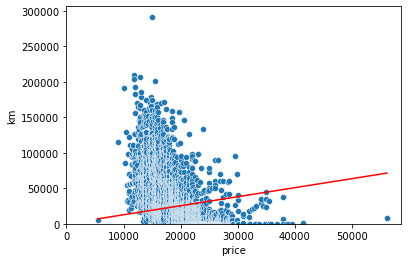

In [17]:
sns.scatterplot(x=x['price'], y=y)
#plotting the line
sns.lineplot(x=x['price'],y=y_pred, color='red')
#axes
plt.xlim(0)
plt.ylim(0)
plt.show()